# Big Data Analytics (BDA)
## GSLC Session 5 & 6

Pristian Budi Dharmawan - 2501983105 - LB20

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### EDA

In [26]:
header = ['department', 'status', 'age', 'salary', 'count']
dataset = pd.read_csv('GSLC_Session_5.csv')

dataset.columns = header

In [27]:
dataset.head()

,department,status,age,salary,count
0,sales,senior,31. . . 35,46K. . . 50K,30
1,sales,junior,26. . . 30,26K. . . 30K,40
2,sales,junior,31. . . 35,31K. . . 35K,40
3,systems,junior,21. . . 25,46K. . . 50K,20
4,systems,senior,31. . . 35,66K. . . 70K,5


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   department  11 non-null     object
 1   status      11 non-null     object
 2   age         11 non-null     object
 3   salary      11 non-null     object
 4   count       11 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 568.0+ bytes


In [29]:
dataset['count'].value_counts()

40    2
3     2
4     2
30    1
20    1
5     1
10    1
6     1
Name: count, dtype: int64

Split the dataset into separate training and test set by 30% Test Size, and 70% Training Size

In [30]:
feature = ['department', 'status', 'age', 'salary']
X = dataset[feature]
y = dataset['count']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
X_train.head(5), X_test.head(5)

(   department  status         age        salary
 1       sales  junior  26. . . 30  26K. . . 30K
 6     systems  senior  41. . . 45  66K. . . 70K
 0       sales  senior  31. . . 35  46K. . . 50K
 7   marketing  senior  36. . . 40  46K. . . 50K
 10  secretary  junior  26. . . 30  26K. . . 30K,
   department  status         age        salary
 2      sales  junior  31. . . 35  31K. . . 35K
 3    systems  junior  21. . . 25  46K. . . 50K
 4    systems  senior  31. . . 35  66K. . . 70K
 9  secretary  senior  46. . . 50  36K. . . 40K)

Since the data type above is a categorical data type, thus we need to standardize it. It's not an ordinal data type, it's a nominal.
We could use these methods:
- OneHot
- Hashing
- Leave-one-out
- Target

In [33]:
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

In [34]:
import re
# Extract numerical values from 'age' and 'salary' columns
def extract_numerical(text):
    # Extracts the first numerical value found in the string
    match = re.search(r'\d+', text)
    if match:
        return int(match.group())
    return None

In [35]:
X_train['age'] = X_train['age'].apply(extract_numerical)
X_train['salary'] = X_train['salary'].apply(extract_numerical)
X_test['age'] = X_test['age'].apply(extract_numerical)
X_test['salary'] = X_test['salary'].apply(extract_numerical)

In [36]:
# Encode categorical variables using category_encoders
encoder = ce.OrdinalEncoder(cols=['department', 'status'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [37]:
# Standardize numerical variables separately for training and testing sets
numerical_cols = ['age', 'salary']

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [38]:
X_train.head(5), X_test.head(5)

(    department  status       age    salary
 1            1       1 -0.935414 -1.289776
 6            2       2  1.870829  1.850548
 0            1       2  0.000000  0.280386
 7            3       2  0.935414  0.280386
 10           4       1 -0.935414 -1.289776,
    department  status       age    salary
 2           1       1  0.000000 -0.897235
 3           2       1 -1.870829  0.280386
 4           2       2  0.000000  1.850548
 9           4       2  2.806243 -0.504695)

### Classify the Decision Tree using Gini Impurity

In [39]:
gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Put it inside the model
gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
# Predict the Test Result with Gini Impurity
y_pred_gini = gini.predict(X_test)

Check for the model accuracy

In [41]:
# Model Accuracy, how often is the classifier correct?
print('Model accuracy score with criterion gini impurity: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini impurity: 0.5000


Overfitting and underfitting checking & Comparing the test set score and training set score

In [42]:
print('Training set score: {:.4f}'.format(gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.5000


### Visualize!

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

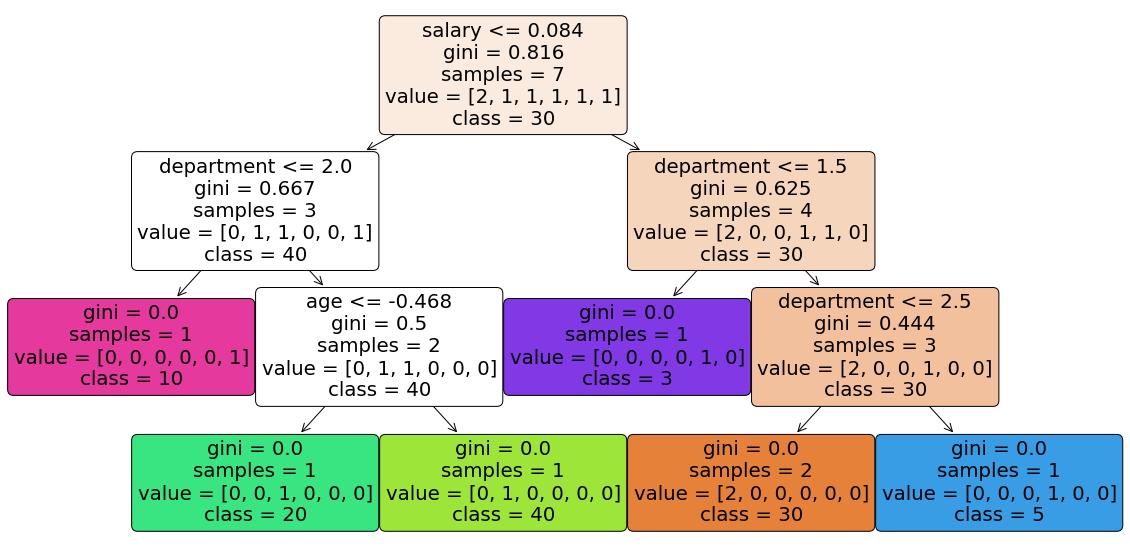

In [44]:
plt.figure(figsize=(20, 10))
plot_tree(gini, feature_names=X_train.columns.tolist(), class_names=[str(i) for i in y.unique()], filled=True, rounded=True)
plt.show()

### Confusion Matrix

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
cm = confusion_matrix(y_test, y_pred_gini)
cm

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1]], dtype=int64)

### Classification Report

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          40       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.40      0.40      0.40         4
weighted avg       0.50      0.50      0.50         4



C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Iannn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMet

# Conclusion

Based on another approach by standardizing the categorical value into a numerical value, the accuracy remains the same, which are 0.5 for the test dataset and 1 for the training dataset. However, we must admit that the maximum depth of gini impurity also plays a vital role in increasing the model's accuracy.

The main factor that affects my Decision Tree Model is:
- Max Depth of the tree; The maximum depth that I use is 3